### Assignment
1. First make your own N data set from the given image
2. Make 2 di-mensional data from 5 dimensional data using PCA. (Non-Kernel 20pts, Kernel20pts)
3. Plot the projected 2 dimensional data on the 2 dimensional space.(10pts) 
4. Cluster the projected 2 dimensional data (10pts)
5. Given the clustered data, apply segmentation of the image. (10pts)
6. Return 5 dimen-sional data from the 2 dimensional data using inverse PCA. (30pts)

In [1]:
import numpy as np
from matplotlib import pyplot as plt

image shape: (609, 960, 3)


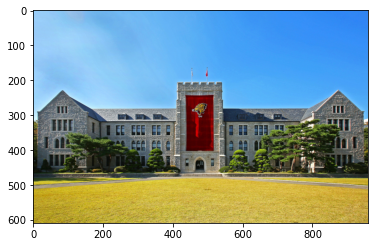

In [2]:
#1
img = plt.imread('./KU_image.jpeg')
plt.imshow(img)
print('image shape:',img.shape)

In [3]:
img = np.array(img)
height = img.shape[0]
width = img.shape[1]
print(width, height)

960 609


In [4]:
img_stacked = np.vstack(img)
img_stacked.shape

(584640, 3)

In [5]:
xy = [[x,y] for x in range(width) for y in range(height)]
xy = np.array(xy)
print(xy[0],xy.shape)

[0 0] (584640, 2)


In [20]:
img_5dim = np.concatenate((img_stacked, xy),axis=1)
print(img_5dim.shape, img_5dim[0])

(584640, 5) [154 209 248   0   0]


In [22]:
#sklearn
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
norm_x = scaler.fit_transform(img_5dim)
pca = PCA(n_components=2)
x_pca = pca.fit_transform(norm_x)
print('pca components,', pca.components_)
print('pca explained variance,', pca.explained_variance_)
print('pca explained variance ratio,',pca.explained_variance_ratio_)
print('original dimension {}, reduced dimension {}'.format(norm_x.shape, x_pca.shape))

pca components, [[ 3.15283153e-02 -4.57094897e-01 -6.71930027e-01  5.81876488e-01
   1.07831828e-04]
 [ 7.49459074e-01  5.56454390e-01 -3.41543175e-02  3.57075686e-01
   2.11588080e-04]]
pca explained variance, [2.14870439 1.71746033]
pca explained variance ratio, [0.42974014 0.34349148]
original dimension (584640, 5), reduced dimension (584640, 2)


2


Text(0, 0.5, 'pc 2')

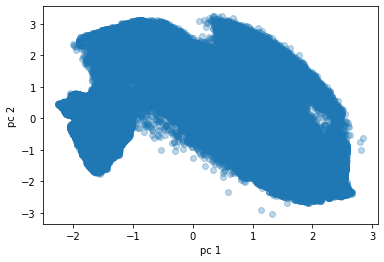

In [27]:
print(x_pca.shape[1])
plt.scatter(x_pca[:,0],x_pca[:,1],alpha=0.3)
plt.xlabel('pc 1')
plt.ylabel('pc 2')
# plt.axis('equal')

(-3.437083290956835,
 3.7970845950895487,
 -1.8409412088930672,
 2.8486467778283746)

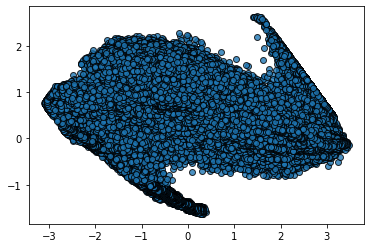

In [66]:
# x_new = pca.inverse_transform(x_pca)
# # plt.scatter(norm_x[:,0],norm_x[:,1],alpha=0.2)
# #plt.scatter(x_new[:,0],x_new[:,1],alpha=0.8,edgecolor='black')
# plt.scatter(x_pca[:,0],x_pca[:,1],alpha=0.8,edgecolor='black')
# plt.axis('equal')

In [114]:
# sklearn clustering the projected data
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=2, random_state=0)
kmeans.fit(x_pca)

KMeans(n_clusters=2, random_state=0)

In [115]:
cluster_idx = kmeans.predict(x_pca)
cluster_centers = kmeans.cluster_centers_
cluster_labels = kmeans.labels_

In [116]:
df_kmeans = pd.DataFrame({'pc1':x_pca[:,0],'pc2':x_pca[:,1],'cluster':cluster_idx})
df_kmeans

,pc1,pc2,cluster
0,-2.213252,0.439783,0
1,-2.242796,0.483983,0
2,-2.236804,0.423743,0
3,-2.233908,0.428451,0
4,-2.248680,0.450552,0
...,...,...,...
584635,1.489078,1.919399,1
584636,1.702450,1.691455,1
584637,1.326286,2.209351,1
584638,1.943555,1.205612,1


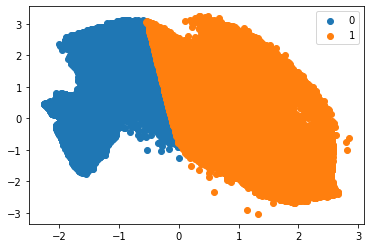

In [119]:
# df_kmeans[df_kmeans['cluster']==4]

for i in range(2):
    plt.scatter(df_kmeans[df_kmeans['cluster']==i]['pc1'], df_kmeans[df_kmeans['cluster']==i]['pc2'] , label = i)
plt.legend()
plt.show()

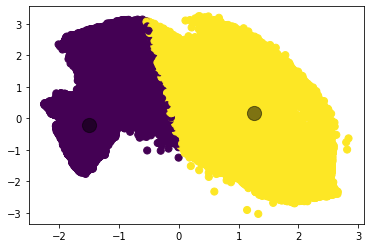

In [118]:
plt.scatter(x_pca[:, 0], x_pca[:, 1], c=cluster_idx, s=50, cmap='viridis')
plt.scatter(cluster_centers[:, 0], cluster_centers[:, 1], c='black', s=200, alpha=0.5)

In [ ]:
#inverse

In [121]:
#cluster_centers[cluster_labels] #converts each label array item to cluster_center value (idx)
centers = np.uint8(cluster_centers)
segment = centers[cluster_labels]
print(segment.shape) #(row,[x,y])
print(centers)
print(segment[:10])

(584640, 2)
[[255   0]
 [  1   0]]
[[255   0]
 [255   0]
 [255   0]
 [255   0]
 [255   0]
 [255   0]
 [255   0]
 [255   0]
 [255   0]
 [255   0]]


In [83]:
# add segmentation to the image
plt.imshow(cluster_centers[cluster_labels].reshape(height,width,3))

ValueError: cannot reshape array of size 1169280 into shape (609,960,3)

<Figure size 1080x576 with 0 Axes>

In [16]:
#2
from sklearn.preprocessing import StandardScaler

def pca_nk(x):
    #1. normalize data
    scaler = StandardScaler()
    norm_x = scaler.fit_transform(x)
    
    #2. covariate matrix
    cov_mat = np.cov(norm_x.T)
    
    #3. eigenval, eigenvec
    eig_val, eig_vec = np.linalg.eig(cov_mat)
    print('first pc',eig_val[0] / sum(eig_val)) #explained variance ratio for pc 1
    print('second pc',eig_val[1] / sum(eig_val))
    
    #4. sort eigvec by decreasing eigval (big eigval = big distance = big variance)
    order = eig_val.argsort()[::-1]
    eig_vec = eig_vec[:,order]
    
    #5. select k number of pc
    eig_vec = eig_vec[:,:2]
    print('2 eig vec',eig_vec.shape)
    
    #6. project data to subspace 
    projected_x = norm_x.dot(eig_vec)
    print('Project {} dimensions to {} dimensions.'.format(norm_x.shape[1], projected_x.shape[1]))
    return projected_x

In [17]:
r = img_3dim[:,:,0]
g = img_3dim[:,:,1]
b = img_3dim[:,:,2]

In [18]:
red,green,blue = pca_nk(r), pca_nk(g),pca_nk(b)
red.shape

first pc (0.6419674716552827+0j)
second pc (0.12818415278255263+0j)
2 eig vec (960, 2)
Project 960 dimensions to 2 dimensions.
first pc (0.6257353389719259+0j)
second pc (0.07467473579165687+0j)
2 eig vec (960, 2)
Project 960 dimensions to 2 dimensions.
first pc (0.8451899884358693+0j)
second pc (0.05422644707340121+0j)
2 eig vec (960, 2)
Project 960 dimensions to 2 dimensions.


(609, 2)

D:\anaconda\lib\site-packages\numpy\core\_asarray.py:138: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order, subok=True)


(-40.92258018556148, 62.20173556914775, -23.25943574527238, 32.71909517859759)

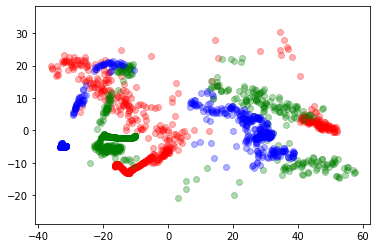

In [36]:
#3
# plt.scatter(red[:,0],red[:,1], color='red', alpha=0.3)
# plt.scatter(green[:,0],green[:,1], color='green', alpha=0.3)
# plt.scatter(blue[:,0],blue[:,1], color='blue', alpha=0.3)
# plt.axis('equal')

first pc 0.4297401431546421
second pc 0.34349147944024805
2 eig vec (5, 2)
Project 5 dimensions to 2 dimensions.


(-2.5059752867939475, 3.090847923545115, -3.548997123830705, 3.344941756273625)

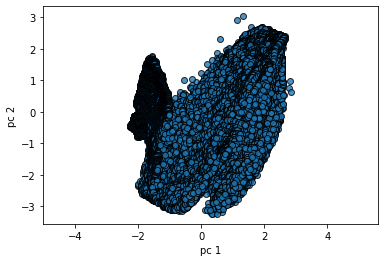

In [51]:
pca_x = pca_nk(img_5dim)
plt.scatter(pca_x[:,0],pca_x[:,1], alpha=0.8,edgecolor='black')
plt.xlabel('pc 1')
plt.ylabel('pc 2')
plt.axis('equal')

In [159]:
#3
import pandas as pd
import seaborn as sns

df_r = pd.DataFrame(red, columns=['pc1','pc2'])
df_r['label'] = 'red'
df_g = pd.DataFrame(green, columns=['pc1','pc2'])
df_g['label'] = 'green'
df_b = pd.DataFrame(blue, columns=['pc1','pc2'])
df_b['label'] = 'blue'
df = pd.concat([df_r,df_g,df_b])
df

,pc1,pc2,label
0,-16.442494+0.000000j,-11.124499+0.000000j,red
1,-16.415971+0.000000j,-11.074847+0.000000j,red
2,-16.407347+0.000000j,-11.066727+0.000000j,red
3,-16.413038+0.000000j,-11.011914+0.000000j,red
4,-16.459163+0.000000j,-10.916268+0.000000j,red
...,...,...,...
604,26.892335+0.000000j,-2.527482+0.000000j,blue
605,27.071784+0.000000j,-2.685049+0.000000j,blue
606,26.620339+0.000000j,-2.076448+0.000000j,blue
607,26.508873+0.000000j,-2.564790+0.000000j,blue


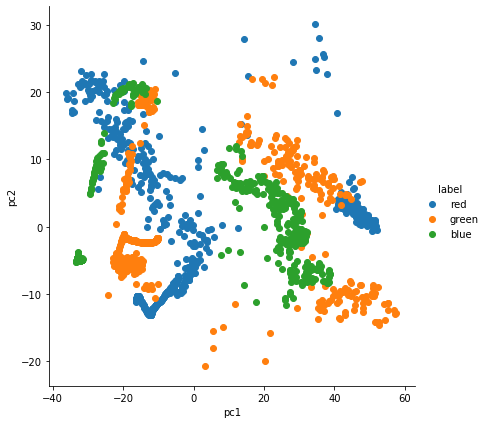

In [169]:
scatter_plt = sns.FacetGrid(df, hue="label", height=6).map(plt.scatter,'pc1','pc2').add_legend()

plt.show()

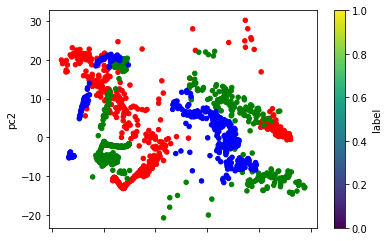

In [175]:
ax1 = df.plot.scatter(x='pc1',y='pc2',c='label')

In [33]:
#6
def inverse_pca(x):
    #1. normalize data
    scaler = StandardScaler()
    norm_x = scaler.fit_transform(x)
    
    #2. covariate matrix
    cov_mat = np.cov(norm_x.T)
    
    #3. eigenval, eigenvec
    eig_val, eig_vec = np.linalg.eig(cov_mat)
    print(eig_val[0] / sum(eig_val))
    print(eig_val[1] / sum(eig_val))
    
    #4. sort eigvec by decreasing eigval (big eigval = big distance = big variance)
    order = eig_val.argsort()[::-1]
    eig_vec = eig_vec[:,order]
    print('eig_vec',eig_vec.shape)
     
    #5. select k number of pc
    eig_vec = eig_vec[:,:2]
    print(eig_vec.shape)
    
    #6. project data to subspace 
    pc_of_x = np.dot(norm_x, eig_vec)
    print(pc_of_x.shape)
    
    #7. reconstruct data 
    recon = np.dot(pc_of_x, eig_vec.T)
    print(recon.shape)
    
    #8. inverse scale 
    recon_inv = scaler.inverse_transform(recon)
    return np.uint8(np.absolute(recon_inv))

In [34]:
r_img = inverse_pca(img_5dim)

0.4297401431546421
0.34349147944024805
eig_vec (5, 5)
(5, 2)
(584640, 2)
(584640, 5)


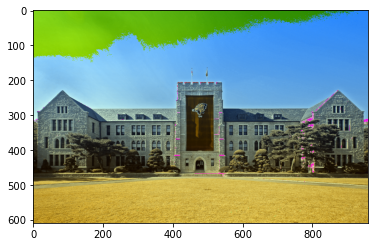

In [35]:
new_img = np.delete(r_img,[3,4],axis=1)
plt.imshow(np.reshape(new_img, (height,width,3)))

### Implementing PCA 
1. Normalize data
2. Create a covariance matrix
3. Calculate eigenvalues and eigenvectors using the cov matrix
4. Sort the eigenvectors by decreasing eigenvalues 
    (Biggest eigenvalue == biggest distance from origin == most descriptive pc)
5. Select k number of pc (==num of eigenvectors)
6. Project data (normalized data * k number of eigen vectors)
7. Reconstruct data (projected data * transposed eigen vectors)

In [74]:
from sklearn.preprocessing import StandardScaler

def my_pca(x,k):
    #1. normalize data
    scaler = StandardScaler()
    norm_x = scaler.fit_transform(x)
    
    #2. covariate matrix
    cov_mat = np.cov(norm_x.T)
    
    #3. eigenval, eigenvec
    eig_val, eig_vec = np.linalg.eig(cov_mat)
    
    #4. sort eigvec by decreasing eigval (big eigval = big distance = big variance)
    order = eig_val.argsort()[::-1]
    eig_vec = eig_vec[:,order]
    
    #5. select k number of pc
    eig_vec = eig_vec[:,:k]
    
    #6. project data to subspace 
    pc_of_x = np.dot(norm_x, eig_vec)
    
    #7. reconstruct data 
    recon = np.dot(pc_of_x, eig_vec.T)
    
    #8. inverse scale 
    recon_inv = scaler.inverse_transform(recon)
    return np.uint8(np.absolute(recon_inv))

k = 30
r_red, r_green,r_blue = my_pca(red,k),my_pca(green,k),my_pca(blue,k)
r_img = np.dstack((r_red,r_green,r_blue))
r_img.shape
plt.imshow(r_img)